<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1D" data-toc-modified-id="1D-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1D</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Ridge:-gaussian-kernel" data-toc-modified-id="Ridge:-gaussian-kernel-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ridge: gaussian kernel</a></span></li><li><span><a href="#Ridge:-polynominal-kernel" data-toc-modified-id="Ridge:-polynominal-kernel-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ridge: polynominal kernel</a></span></li><li><span><a href="#Ridge:-natrual-quadratic-splines" data-toc-modified-id="Ridge:-natrual-quadratic-splines-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ridge: natrual quadratic splines</a></span></li><li><span><a href="#Support-vector-machine:-gaussian-kernel" data-toc-modified-id="Support-vector-machine:-gaussian-kernel-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Support vector machine: gaussian kernel</a></span></li><li><span><a href="#Local-weighted-average-(kernel-regression):--k-neighbors-$\oplus$-uniform-kernel" data-toc-modified-id="Local-weighted-average-(kernel-regression):--k-neighbors-$\oplus$-uniform-kernel-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Local weighted average (kernel regression):  k-neighbors $\oplus$ uniform kernel</a></span></li><li><span><a href="#Local-weighted-average-(kernel-regression):-radius-neighbors-$\oplus$-uniform-kernel" data-toc-modified-id="Local-weighted-average-(kernel-regression):-radius-neighbors-$\oplus$-uniform-kernel-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Local weighted average (kernel regression): radius neighbors $\oplus$ uniform kernel</a></span></li><li><span><a href="#Local-weighted-average-(kernel-regression):-k-neighbors-$\oplus$--tri-cube-kernel" data-toc-modified-id="Local-weighted-average-(kernel-regression):-k-neighbors-$\oplus$--tri-cube-kernel-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Local weighted average (kernel regression): k-neighbors $\oplus$  tri-cube kernel</a></span></li><li><span><a href="#local-regression:-k-neighbors-$\oplus$-linear-$\oplus$-tri-cube-kernel" data-toc-modified-id="local-regression:-k-neighbors-$\oplus$-linear-$\oplus$-tri-cube-kernel-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>local regression: k-neighbors $\oplus$ linear $\oplus$ tri-cube kernel</a></span></li><li><span><a href="#local-regression:-k-neighbors-$\oplus$-quadratic-$\oplus$-tri-cube-kernel" data-toc-modified-id="local-regression:-k-neighbors-$\oplus$-quadratic-$\oplus$-tri-cube-kernel-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>local regression: k-neighbors $\oplus$ quadratic $\oplus$ tri-cube kernel</a></span></li><li><span><a href="#Gaussian-process" data-toc-modified-id="Gaussian-process-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Gaussian process</a></span></li><li><span><a href="#Decision--tree" data-toc-modified-id="Decision--tree-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Decision  tree</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>AdaBoost</a></span></li><li><span><a href="#Gradient-boosting-decision-tree" data-toc-modified-id="Gradient-boosting-decision-tree-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>Gradient boosting decision tree</a></span></li><li><span><a href="#Multi-layer-Perceptron-regressor" data-toc-modified-id="Multi-layer-Perceptron-regressor-1.16"><span class="toc-item-num">1.16&nbsp;&nbsp;</span>Multi-layer Perceptron regressor</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.17"><span class="toc-item-num">1.17&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

import pandas as pd

%matplotlib inline
from IPython.display import display
import pandas as pd
from sklearn.metrics import mean_squared_error
def RMSE(y, y2):
    return np.sqrt(mean_squared_error(y, y2))

In [2]:

    
class DummyRegressor:
    
    def __init__(self, alpha=None):
        self.alpha = 0
    
    def set_params(self,**kargs):
        for key in kargs:
            if key == "alpha":
                self.alpha = kargs[key]
        
        return self
    def get_params(self, deep=False):
        return {
            "alpha": self.alpha
        }
    
    def fit(self,X,y):
        pass
    
    def predict(self,X):
        return np.zeros(X.shape[0])
    
    def score(self, X, y):
        return 0
        
class even_odd_spliter:
    
    def split(self, X, y=None, groups=None):
        L = len(X)
        train = np.arange(0,L,2)
        test = np.arange(1,L,2)
        yield train, test
        
    def get_n_splits(self,*args, **kargs):
        return 1
    
class the_same_train_test:
    
    def split(self, X, y=None, groups=None):
        L = len(X)
        train = np.arange(0,L,1)
        test = np.arange(0,L,1)
        yield train, test
        
    def get_n_splits(self,*args, **kargs):
        return 1
    
        


# 1D

In [3]:
default_s=1
numbers={}
def plot1D(model, dataset, label=None, s=None):
    
    if s is None:
        s = default_s
        
    X_train, y_train, X_plt, f, name = dataset
    
    model.fit(X_train, y_train)
    yhat= model.predict(X_plt)
    rmse = RMSE(yhat, f(X_plt))
    
    if label is not None:
        if name not in numbers:
            numbers[name] = {}
        numbers[name][label] = rmse
    
    plt.figure(figsize=(4,4))
    plt.title("%s\nRMSE = %.2E"%(name,rmse))
    plt.scatter(X_train, y_train, label="data", color="blue",s=s)
    plt.plot(X_plt, f(X_plt), label="truth", color="green", linewidth=3)
    plt.plot(X_plt, yhat, label="predict", color="orange", linewidth=3)
    plt.legend()
    plt.show()
    
    if type(model) is GridSearchCV:
        print(model.best_estimator_)
    elif type(model) is GaussianProcessRegressor:
        print(model.kernel_)
        
        
def plot_dataset(dataset):
    X_train, y_train, X_plt, f, name = dataset
    plt.figure(figsize=(4,4))
    plt.plot(X_plt, f(X_plt), label="truth", color="red")
    plt.scatter(X_train, y_train, label="data")
    plt.legend()
    plt.title(name)
    plt.show()


## Data

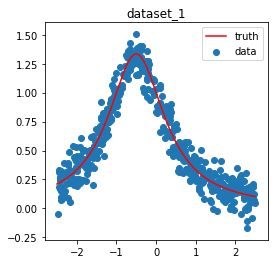

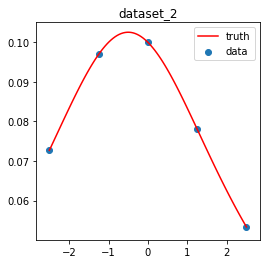

In [138]:
def get_dataset_1d_1():
    def f(X):
        return 1 / (1 + (X[:,0])**2 + X[:,0]) 

    SIGMA=0.1
    N_train = 500
    np.random.seed(0)
    X_train = 5*(np.random.rand(N_train, 1) - 0.5)
    y_train = f(X_train) + SIGMA*np.random.randn(N_train)
    X_plt = 5*(np.linspace(0,1,N_train) - 0.5).reshape(-1,1)    
    return (X_train,y_train,X_plt, f, "dataset_1")


def get_dataset_1d_2():
    def f(X):
        return 1 / (10 + (X[:,0])**2 + X[:,0]) 
        #return 1 + X[:,0]+ X[:,0]**2

    SIGMA=0
    N_train = 5
    np.random.seed(1)
    X_train = 5*(np.linspace(0,1,N_train).reshape(-1,1) - 0.5)
    y_train = f(X_train) + SIGMA*np.random.randn(N_train)
    X_plt = 5*(np.linspace(0,1,100) - 0.5).reshape(-1,1)
    return (X_train,y_train,X_plt,f, "dataset_2")
        
    


numbers = {}


dataset_1d_1 = get_dataset_1d_1()        
plot_dataset(dataset_1d_1)
numbers_1 = {}

dataset_1d_2 = get_dataset_1d_2() 
plot_dataset(dataset_1d_2)
numbers_2 = {}

## Ridge: gaussian kernel

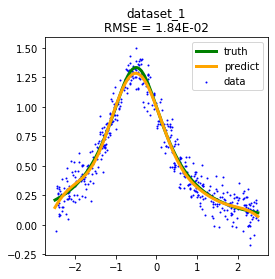

KernelRidge(alpha=0.005, coef0=1, degree=3, gamma=0.5, kernel='rbf',
            kernel_params=None)


In [5]:
param_grid = {
    "alpha": [1E-4, 1E-3, 5E-3, 1E-2, 1E-1, 5E-1, 1E0],
    "kernel": ["rbf"],
    "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2]
}

plot1D(GridSearchCV(KernelRidge(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="ridge: gaussian kernel")



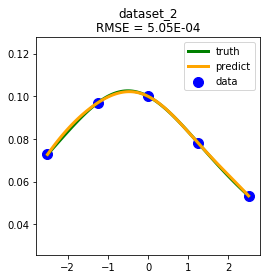

KernelRidge(alpha=0.0001, coef0=1, degree=3, gamma=0.3, kernel='rbf',
            kernel_params=None)


In [6]:
param_grid = {
    "alpha": [1E-4, 1E-3, 5E-3, 1E-2, 4E-2, 5E-2, 6E-2, 7E-2, 1E-1, 5E-1, 1E0],
    "kernel": ["rbf"],
    "gamma": np.linspace(0.3, 0.8, 100)
}
plot1D(GridSearchCV(KernelRidge(gamma=0.25, alpha=0.001),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="ridge: gaussian kernel",
       s=100)

## Ridge: polynominal kernel

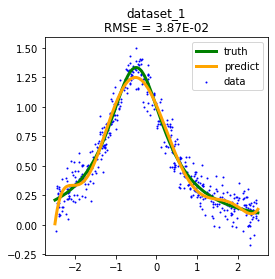

KernelRidge(alpha=0.1, coef0=10, degree=8, gamma=2, kernel='poly',
            kernel_params=None)


In [7]:
param_grid = {
    "alpha": [1E-2, 0.1, 1, 2, 5, 10],
    "kernel": ['poly'],
    "degree": [8],
    "coef0": [0.5, 1, 2, 5, 10],
    "gamma": [1E-2, 0.1, 0.5, 1, 2]
}

plot1D(GridSearchCV(KernelRidge(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="ridge: polynominal kernel")

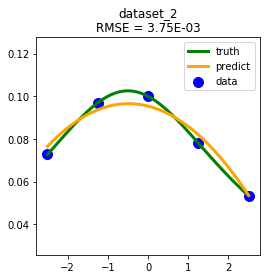

KernelRidge(alpha=5, coef0=5, degree=6, gamma=0.01, kernel='poly',
            kernel_params=None)


In [8]:
param_grid = {
    "alpha": [1E-2, 0.1, 1, 2, 5, 10],
    "kernel": ['poly'],
    "degree": [6, 7, 8, 9, 10, 11],
    "coef0": [0.5, 1, 2, 5, 10],
    "gamma": [1E-2, 0.1, 0.5, 1, 2]
}

plot1D(GridSearchCV(KernelRidge(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="ridge: polynominal kernel",
       s=100)

## Ridge: natrual quadratic splines

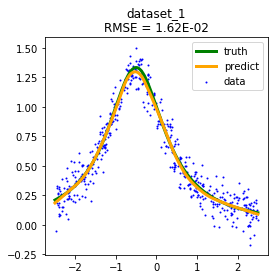

QuadraticSplineRegression(knots[8]=[-2.         -1.42857143 -0.85714286 -0.28571429  0.28571429  0.85714286
  1.42857143  2.        ],alpha=1.0E-03,alphac=1.0E-06)


In [9]:
from quadratic_spline_regression import QuadraticSplineRegression
import quadratic_spline_regression
from imp import reload
reload(quadratic_spline_regression)

param_grid = {
    "knots": [
        np.linspace(-2, 2, 6),
        np.linspace(-2, 2, 8),
        np.linspace(-2, 2, 9),
        np.linspace(-2, 2, 10),
        np.linspace(-2, 2, 12)
    ],
    "alpha": [0, 1E-10, 1E-9, 1E-8, 1E-6, 1E-3, 1E-1],
    "alphac": [0, 1E-10, 1E-9, 1E-8, 1E-6, 1E-3, 1E-1],
}

plot1D(GridSearchCV(QuadraticSplineRegression(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="ridge: splines")

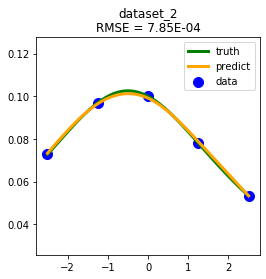

QuadraticSplineRegression(knots[12]=[-2.5        -2.04545455 -1.59090909 -1.13636364 -0.68181818 -0.22727273
  0.22727273  0.68181818  1.13636364  1.59090909  2.04545455  2.5       ],alpha=1.0E-06,alphac=1.0E-02)


In [10]:
from quadratic_spline_regression import QuadraticSplineRegression
#import quadratic_spline_regression
#from imp import reload
#reload(quadratic_spline_regression)

param_grid = {
    "knots": [
        np.linspace(-2.5, 2.5, 6),
        np.linspace(-2.5, 2.5, 7),
        np.linspace(-2.5, 2.5, 8),
        np.linspace(-2.5, 2.5, 9),
        np.linspace(-2.5, 2.5, 10),
        np.linspace(-2.5, 2.5, 12)
    ],
    "alpha": [ 1E-6, 1E-4, 1E-3, 1E-2, 1E-1],
    "alphac": [ 1E-6, 1E-4, 1E-3, 1E-2, 1E-1],
}

plot1D(GridSearchCV(QuadraticSplineRegression(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="ridge: splines",
       s=100)

## Support vector machine: gaussian kernel

In [ ]:
param_grid = {
    "C" : [1E6, 1E5, 1E3, 1, 0.1], "epsilon":[0.02, 0.05, 0.1, 0.5], "kernel": ["rbf"], "gamma":[0.1, 0.25, 0.5, 0.75, 1]
}

svr = SVR(kernel="rbf")
gscv = GridSearchCV(svr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt)
print(gscv.best_estimator_)

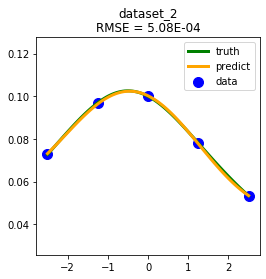

SVR(C=10000000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001,
    gamma=0.15, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)


In [11]:
param_grid = {
    "C": [1E7, 1E6, 1E5, 1E3, 1, 0.1],
    "epsilon": [1E-4, 1E-3, 1E-2, 0.02, 0.05, 0.1],
    "kernel": ["rbf"],
    "gamma": [0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.75, 1]
}


plot1D(GridSearchCV(SVR(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="SVM: gaussian kernel",
       s=100)

## Local weighted average (kernel regression):  k-neighbors $\oplus$ uniform kernel

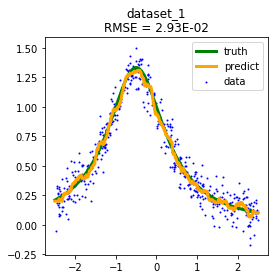

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='uniform')


In [12]:
param_grid = {"n_neighbors": [1, 2, 4, 8, 16, 32, 64, 128]}

plot1D(GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="k-nn")

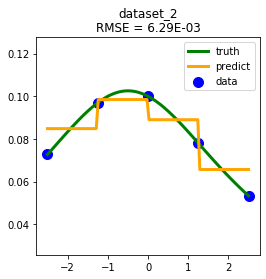

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')


In [13]:
param_grid = {"n_neighbors": np.arange(1,max(4, dataset_1d_2[0].shape[0]//2),1)}

plot1D(GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="k-nn", s=100)

## Local weighted average (kernel regression): radius neighbors $\oplus$ uniform kernel

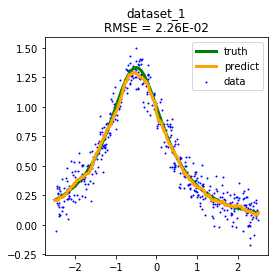

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, p=2,
                         radius=0.19473684210526315, weights='uniform')


In [14]:
param_grid = {"radius": np.linspace(0.1, 1, 20)}

plot1D(GridSearchCV(RadiusNeighborsRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="radius-nn")

In [15]:
if dataset_1d_2[0].shape[0]//2 >= 10:

    param_grid = {"radius": np.linspace(0.6, 1, 20)}

    plot1D(GridSearchCV(RadiusNeighborsRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
           dataset=dataset_1d_2,
           label="radius-nn")

## Local weighted average (kernel regression): k-neighbors $\oplus$  tri-cube kernel

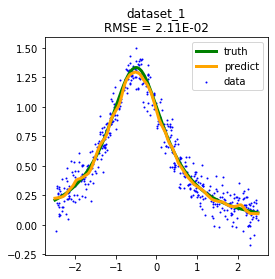

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=1.00E-01, adaptive=1, degree=0)


In [16]:
from LocalRegressor import LocalRegressor

param_grid = {
    "degree": [0],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 100),
}

plot1D(GridSearchCV(LocalRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="knn tri-cube")

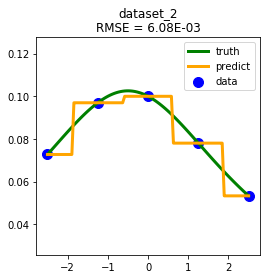

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=3.36E-01, adaptive=1, degree=0)


In [17]:
from LocalRegressor import LocalRegressor

param_grid = {
    "degree": [0],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 100),
}

plot1D(GridSearchCV(LocalRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="knn tri-cube", s=100)

## local regression: k-neighbors $\oplus$ linear $\oplus$ tri-cube kernel

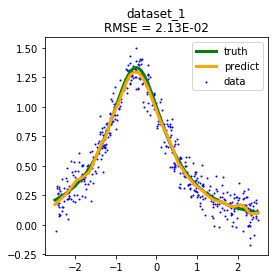

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=1.00E-01, adaptive=1, degree=1)


In [18]:
param_grid = {
    "degree": [1],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 20),
}

plot1D(GridSearchCV(LocalRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="local linear regression")

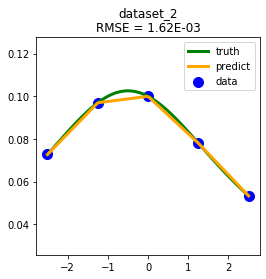

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=3.37E-01, adaptive=1, degree=1)


In [19]:
param_grid = {
    "degree": [1],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 20),
}

plot1D(GridSearchCV(LocalRegressor(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="local linear regression",
       s=100)

## local regression: k-neighbors $\oplus$ quadratic $\oplus$ tri-cube kernel

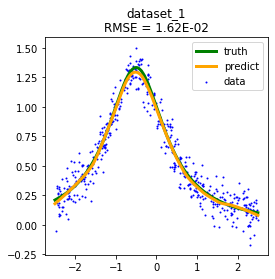

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=2.89E-01, adaptive=1, degree=2)


In [20]:
param_grid = {
    "degree": [2],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 20),
}

plot1D(GridSearchCV(LocalRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="local quadratic regression")

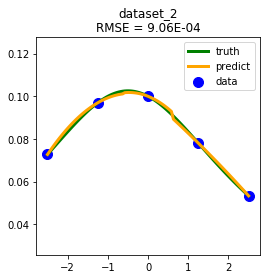

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=6.68E-01, adaptive=1, degree=2)


In [21]:
param_grid = {
    "degree": [2],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 20),
}

plot1D(GridSearchCV(LocalRegressor(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="local quadratic regression",
       s=100)

## Gaussian process

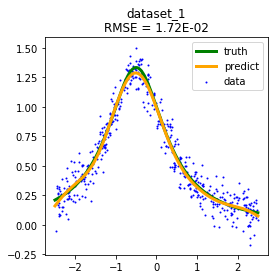

0.505**2 * RBF(length_scale=0.826) + WhiteKernel(noise_level=0.00976)


In [22]:
plot1D(GaussianProcessRegressor(kernel=ConstantKernel(1) * RBF(1) +
                                WhiteKernel(0.1),
                                n_restarts_optimizer=10),
       dataset=dataset_1d_1,
       label="gaussian process")

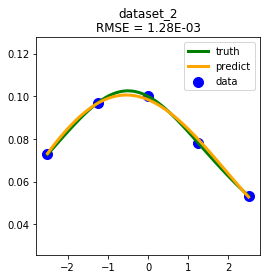

0.0599**2 * RBF(length_scale=3.34) + WhiteKernel(noise_level=1e-05)


In [36]:
plot1D(GaussianProcessRegressor(kernel=ConstantKernel(1) * RBF(1) +
                                WhiteKernel(0.1),
                                n_restarts_optimizer=10,
                                alpha=0,
                                random_state=0),
       dataset=dataset_1d_2,
       label="gaussian process",
       s=100)

## Decision  tree

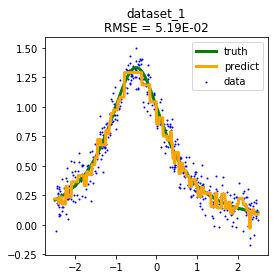

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [24]:
param_grid = {
    "criterion": ['mse'],
    "splitter": ["best"],
    "max_depth": [5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 10],
}

plot1D(GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="decision tree")

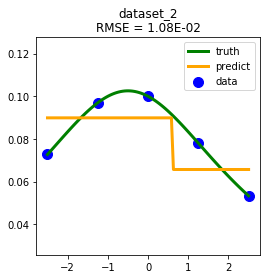

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [25]:
param_grid = {
    "criterion": ['mse'],
    "splitter": ["best"],
    "max_depth": [5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 10],
}

plot1D(GridSearchCV(DecisionTreeRegressor(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="decision tree",
       s=100)

## Random forest

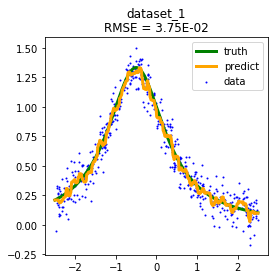

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [26]:
param_grid = {
    "n_estimators": [50, 100, 200, 500],
    "criterion": ["mse"],
    "max_depth": [5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 10],
}

plot1D(GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="random forest")

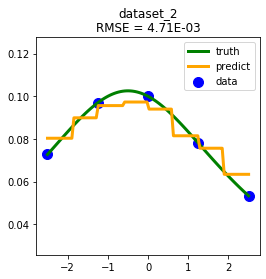

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [27]:
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "criterion": ["mse"],
    "max_depth": [5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 10],
}

plot1D(GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="random forest",s=100)

## AdaBoost

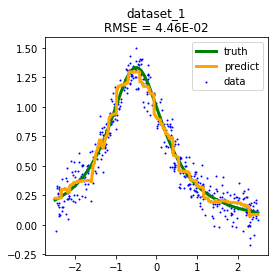

AdaBoostRegressor(base_estimator=None, learning_rate=2.0, loss='exponential',
                  n_estimators=150, random_state=None)


In [28]:
param_grid = {
    "n_estimators": [20, 50, 100, 150],
    "learning_rate": [0.5, 1.0, 2.0],
    "loss": ["linear", 'square', 'exponential']
}

plot1D(GridSearchCV(AdaBoostRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="AdaBoost")

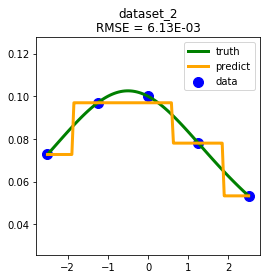

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='exponential',
                  n_estimators=20, random_state=None)


In [29]:
param_grid = {
    "n_estimators": [20, 50, 100, 150],
    "learning_rate": [0.5, 1.0, 2.0],
    "loss": ["linear", 'square', 'exponential']
}

plot1D(GridSearchCV(AdaBoostRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="AdaBoost", s=100)

## Gradient boosting decision tree

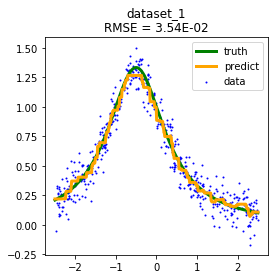

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [30]:
param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.02, 0.05, 0.1, 0.5],
    "min_samples_leaf": [1, 2, 5, 10],
    "loss": ["ls", 'lad'],
    "max_depth": [1, 2, 3]
}

plot1D(GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="GBDT")

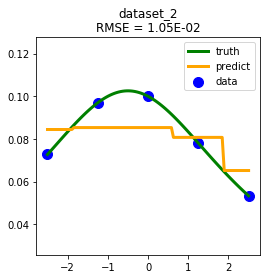

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [31]:
param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.02, 0.05, 0.1, 0.5],
    "min_samples_leaf": [1, 2, 5, 10],
    "loss": ["ls", 'lad'],
    "max_depth": [1, 2, 3]
}

plot1D(GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="GBDT",s=100)

## Multi-layer Perceptron regressor

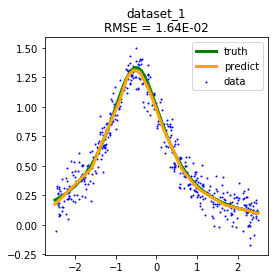

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=50, learning_rate='constant',
             learning_rate_init=1, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=1e-05,
             validation_fraction=0.1, verbose=False, warm_start=False)


In [40]:
param_grid = {
    "hidden_layer_sizes":[50, 100, 200, (100,50), (100,50), (200,100)],
    "activation": ["relu"],
    "solver": ["lbfgs"],
    "learning_rate": ['constant' ],
    "learning_rate_init": [1],
    "max_iter": [2000],
    "tol":[1E-5],
    "alpha":[1E-2, 1E-3, 1E-4]
}

plot1D(GridSearchCV(MLPRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="Multi-layer Perceptron")

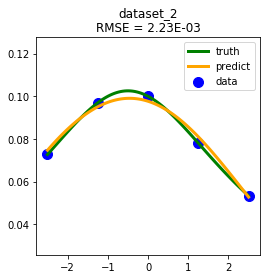

MLPRegressor(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=1000, learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=1e-07,
             validation_fraction=0.1, verbose=False, warm_start=False)


In [152]:
param_grid = {
    #"hidden_layer_sizes":[(2)],
    "hidden_layer_sizes":[(1), (3), (10), (100), (1000), (100,50,50)],
    "activation": ["tanh"],
    "solver": ["lbfgs"],
    "learning_rate": ['constant' ],
    "learning_rate_init": [1E-3],
    "max_iter": [10000],
    "tol":[1E-7],
    "alpha":[1E-2, 1E-3, 1E-4]
}

#m = MLPRegressor(hidden_layer_sizes=(1000), activation="relu", solver="lbfgs", alpha=1E-3, tol=1E-10)
#m.fit(dataset_1d_2[0], dataset_1d_2[1])
# should be identity
#print(m.out_activation_)
#print(m.coefs_)
#print(m.intercepts_)

plot1D(GridSearchCV(MLPRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="Multi-layer Perceptron",
       s=100)

## Summary

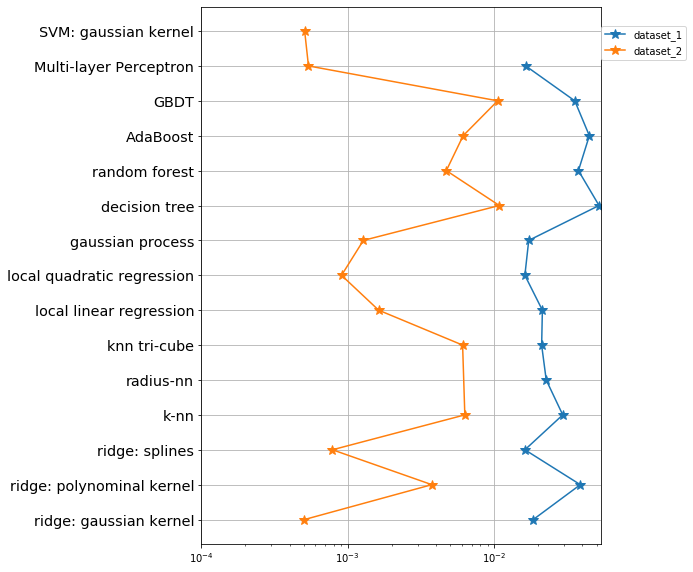

In [46]:
def scale(k, s=0.5):
    if k in keys:
        i = keys.index(k)
        values[i] *= s
        keys[i] = "%s * %.1f"%(keys[i], s)


def plot_perf():
    
    plt.figure(figsize=(12,8))
    
    cnt = 0
    key_to_index= {}
    keys_list=[]
    for dataset in numbers: 
        kv = numbers[dataset]
        
        for key in kv.keys():
            if key not in key_to_index:
                key_to_index[key] =  cnt
                keys_list.append(key)
                cnt += 1
                

    for dataset in numbers:
        
        kv = numbers[dataset]
        
        ks = []
        vs = []
        for key in kv.keys():
            ks.append(key_to_index[key])
            vs.append(kv[key])
            
            
        ks, vs = zip(*sorted(zip(ks, vs)))
        
        plt.plot(vs, ks, marker="*", markersize=10, label=dataset)
        plt.yticks(ticks=range(len(keys_list)), labels=keys_list, fontsize="x-large")
        plt.xlim((1E-4,None))
    
    plt.tight_layout()
    plt.xscale('log')
    plt.grid()
    plt.subplots_adjust(right=0.7)
    plt.legend(loc=(1.0,0.9))
    plt.show()
    

plot_perf()